In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# I. Khái quát chung về bộ dữ liệu “ Employee Loyalty”

1.1 Tổng quan Hr_data

In [211]:
Hr_data = pd.read_csv('hr_data.csv')
Hr_data

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [212]:
check_1 = Hr_data.shape[0]
check_2 = Hr_data.shape[1]
print(f'Bộ dữ liệu hr_data có {check_1} dòng và {check_2} cột' )

Bộ dữ liệu hr_data có 14999 dòng và 9 cột


In [213]:
Hr_data.head() 

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [214]:
Hr_data.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [215]:
Hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [216]:
# Dữ liệu phân loại
Hr_data.select_dtypes(exclude=['int', 'float']).columns 

Index(['department', 'salary'], dtype='object')

In [217]:
# Kiểm tra dữ liệu phân loại bao gồm những gì?
check_3 = Hr_data['department'].unique()
check_4 = Hr_data['salary'].unique()
print(f'Cột quan sát department bao gồm  các phòng bang {check_3}')
print(f'Cột quan sát salary bao gồm  các mức lương {check_4}')

Cột quan sát department bao gồm  các phòng bang ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Cột quan sát salary bao gồm  các mức lương ['low' 'medium' 'high']


1.1.2 Tổng quan “employee_satisfaction_evaluation”

In [218]:
employee = pd.read_excel('employee_satisfaction_evaluation.xlsx')
employee

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [219]:
check_e_1 = employee.shape[0]
check_e_2 = employee.shape[1]
print(f'Bộ dữ liệu employee_satisfaction_evaluation có {check_e_1} dòng và {check_e_2} cột' )

Bộ dữ liệu employee_satisfaction_evaluation có 14999 dòng và 3 cột


In [220]:
employee.describe()

,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14972.000000,14972.000000
mean,45424.627575,0.612830,0.716125
std,25915.900127,0.248714,0.171138
min,1003.000000,0.090000,0.360000
25%,22872.500000,0.440000,0.560000
50%,45448.000000,0.640000,0.720000
75%,67480.500000,0.820000,0.870000
max,99815.000000,1.000000,1.000000


In [221]:
employee.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [222]:
employee.tail()

,EMPLOYEE #,satisfaction_level,last_evaluation
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96
14998,87684,0.37,0.52


# II. Khám phá dữ liệu

2.1. Tiền xử lý dữ liệu

- 2.1.1. gộp dữ liệu

In [223]:
df = Hr_data.set_index('employee_id').join(employee.set_index('EMPLOYEE #'))
df = df.reset_index()
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [224]:
df.shape

(14999, 11)

- 2.1.2 Kiểm tra dữ liệu

In [225]:
df.isnull().sum().sort_values(ascending=False) 

satisfaction_level       27
last_evaluation          27
employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
dtype: int64

,Total,Percent
satisfaction_level,27,0.0018
last_evaluation,27,0.0018
employee_id,0,0.0000
number_project,0,0.0000
average_montly_hours,0,0.0000
time_spend_company,0,0.0000
Work_accident,0,0.0000
left,0,0.0000
promotion_last_5years,0,0.0000
department,0,0.0000


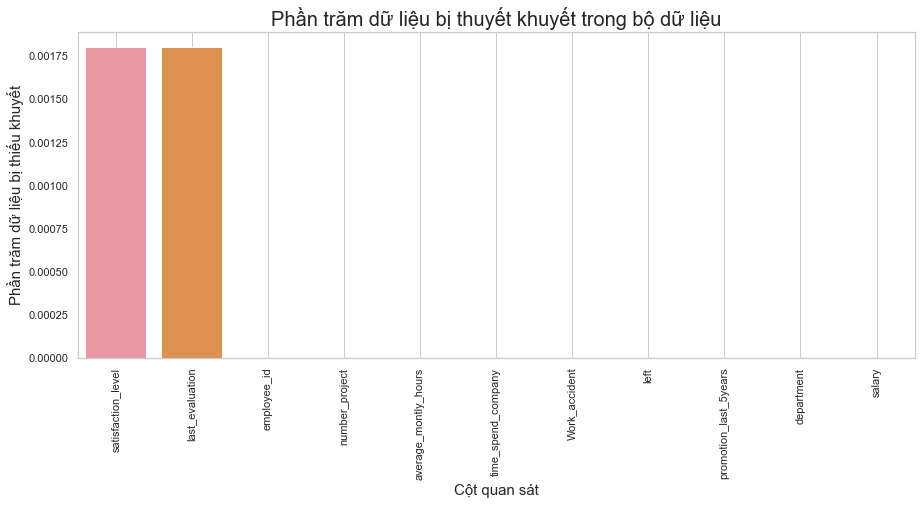

In [226]:
# Phần trăm bị thiếu khuyết
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# phần trăm khuyết = số lượng khuyết / tổng số dòng.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Visualization missing data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Cột quan sát', fontsize=15)
plt.ylabel('Phần trăm dữ liệu bị thiếu khuyết', fontsize=15)
plt.title('Phần trăm dữ liệu bị thuyết khuyết trong bộ dữ liệu', fontsize=20)
plt.grid()
missing_data

- 2.1.3 Xử lý dữ liệu khuyết

In [227]:
df_check = df

In [228]:
df = df.dropna(thresh=10)

In [229]:
df[df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
191,2160,4,226,6,1,1,0,technical,medium,0.92,NaN
352,3150,4,262,6,0,1,0,support,low,NaN,0.91
376,3250,4,296,2,0,1,0,IT,medium,0.56,NaN
402,3405,5,275,5,0,1,0,sales,low,NaN,1.00
427,78130,3,180,4,0,1,0,technical,medium,NaN,0.60
442,3635,5,229,5,0,1,0,management,low,0.77,NaN
468,3755,5,245,5,0,1,0,sales,low,NaN,0.92
543,4150,5,237,5,0,1,0,sales,medium,0.89,NaN
892,43615,4,276,5,0,1,0,support,low,0.74,NaN


In [230]:
df.fillna(df.mean(), inplace=True)

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_12300/820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
c:\Users\Acer Nitro5\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [231]:
Delete_per = (df.shape[0]/df_check.shape[0])*100
print(f"Phần trăm còn lại của dữ liệu là {Delete_per}")

Phần trăm còn lại của dữ liệu là 99.92666177745183


In [232]:
# Kiểm tra
df[df.isnull().any(axis=1)] 

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


2.2. Trực quan hóa dữ liệu

- 2.2.1. Các biến định lượng

- ###### number_project

In [233]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_12300/4257502385.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  number_project.set_yticklabels(number_project.get_yticks(), size = 20)


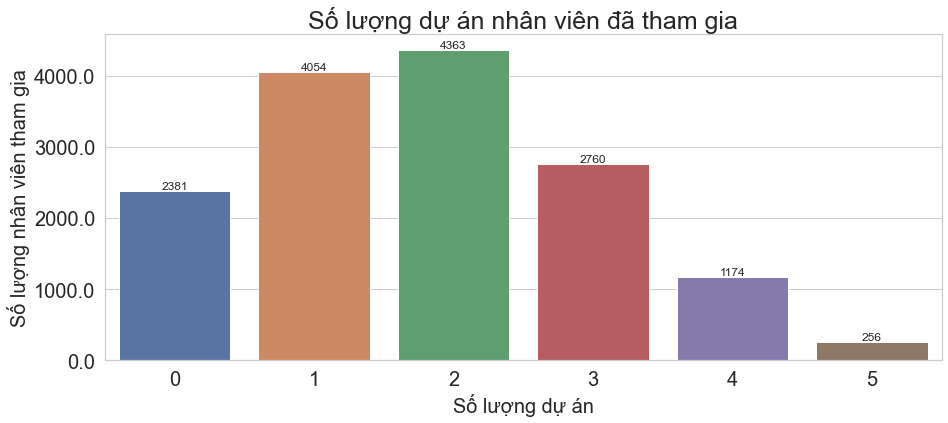

In [234]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6))
number_project = sns.countplot(x ='number_project', data = df)
number_project.bar_label(ax.containers[0])
number_project.axes.set_title('Số lượng dự án nhân viên đã tham gia', fontsize=25) 
number_project.set_xlabel("Số lượng dự án",fontsize=20)
number_project.set_ylabel("Số lượng nhân viên tham gia",fontsize=20)
number_project.set_yticklabels(number_project.get_yticks(), size = 20)
number_project.set_xticklabels(number_project.get_xticks(), size = 20)
plt.show()


In [235]:
df_test = df[(df['number_project'] == 7)]
df_test 

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
43,7010,7,281,4,0,1,0,technical,low,0.10,0.80
54,1341,7,307,4,0,1,0,support,low,0.10,0.92
56,14030,7,255,4,0,1,0,support,low,0.11,0.94
61,1399,7,308,4,0,1,0,IT,medium,0.11,0.93
...,...,...,...,...,...,...,...,...,...,...,...
14899,87116,7,244,5,0,1,0,hr,medium,0.10,0.81
14908,87171,7,251,5,0,1,0,technical,low,0.10,0.87
14929,66515,7,302,5,0,1,0,IT,medium,0.10,0.83
14933,87308,7,264,4,0,1,0,IT,medium,0.10,0.94


In [236]:
df_test = df[(df['number_project'] == 7)][['promotion_last_5years','left']]
df_test.value_counts()

promotion_last_5years  left
0                      1       256
dtype: int64

In [237]:
df_test_1 = df[(df['number_project'] == 6)][['promotion_last_5years','left']]
df_test_1.value_counts()

promotion_last_5years  left
0                      1       652
                       0       502
1                      0        17
                       1         3
dtype: int64

- ###### Salary

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_12300/41070261.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  number_project.set_yticklabels(number_project.get_yticks(), size = 20)


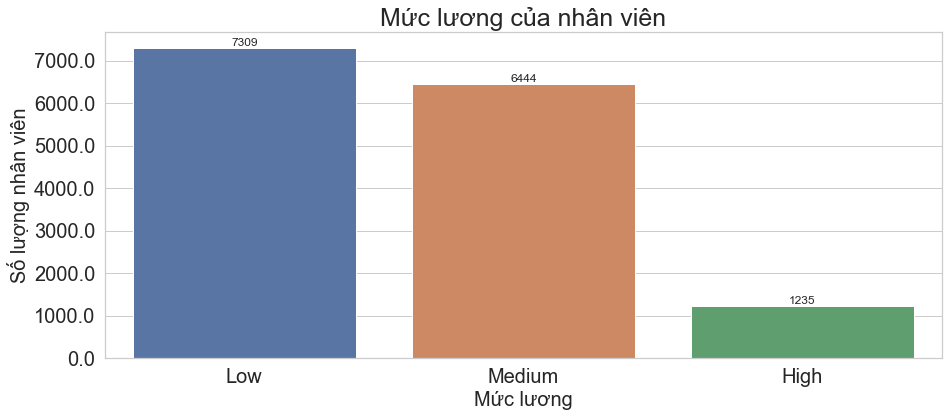

In [238]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 6))
number_project = sns.countplot(x ='salary', data = df)
number_project.bar_label(ax.containers[0])
number_project.axes.set_title('Mức lương của nhân viên', fontsize=25) 
number_project.set_xlabel("Mức lương",fontsize=20)
number_project.set_ylabel("Số lượng nhân viên",fontsize=20)
number_project.set_yticklabels(number_project.get_yticks(), size = 20)
number_project.set_xticklabels(number_project.get_xticks(), size = 20) 
number_project.set_xticklabels(['Low','Medium','High'])
plt.show()


In [239]:
df_test_2 = df[(df['salary'] == 'high')][['promotion_last_5years','left']]
df_test_2.value_counts()

promotion_last_5years  left
0                      0       1082
                       1         81
1                      0         72
dtype: int64

- ###### Cột quan sát Satisfaction_level và Last_evaluation

In [240]:
df[['satisfaction_level','last_evaluation']].describe()

,satisfaction_level,last_evaluation
count,14988.000000,14988.000000
mean,0.612830,0.716125
std,0.248581,0.171047
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.720000
75%,0.820000,0.870000
max,1.000000,1.000000


2.2.2. Các quan sát định tính

In [241]:
df.head(2)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86


In [242]:
gr_1 = df.groupby(['department','salary']).agg( Count = ( 'department','count' )).reset_index()
# gr_1.to_excel('Test.xlsx')

In [243]:
a = gr_1[gr_1['department'] == 'IT']
b = gr_1[gr_1['department'] == 'RandD']
c = gr_1[gr_1['department'] == 'accounting']
d = gr_1[gr_1['department'] == 'hr']
e = gr_1[gr_1['department'] == 'management']
f = gr_1[gr_1['department'] == 'marketing']
g = gr_1[gr_1['department'] == 'product_mng']
h = gr_1[gr_1['department'] == 'sales']
k = gr_1[gr_1['department'] == 'support']
j = gr_1[gr_1['department'] == 'technical']

In [244]:
j

,department,salary,Count
27,technical,high,201
28,technical,low,1371
29,technical,medium,1146


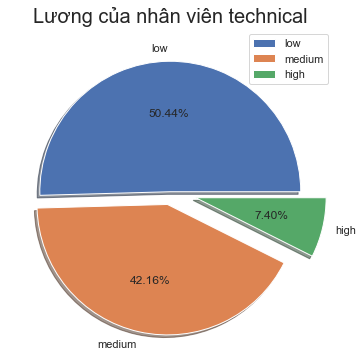

In [245]:
f, ax = plt.subplots(figsize=(15, 6))
x = [1371, 1146, 201]
labels = ['low','medium','high']
explode = [0, 0.1, 0.2]
plt.pie(x, labels=labels,shadow=True, autopct='%1.2f%%', explode=explode);
plt.title('Lương của nhân viên technical', fontsize = 20);
plt.legend() 

- 2.2.3. Mức độ tương quan giữa các quan sát

In [246]:
df.corr()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
employee_id,1.000000,-0.010202,-0.008153,0.104619,0.010721,-0.098481,0.080186,0.041806,-0.011509
number_project,-0.010202,1.000000,0.416828,0.196896,-0.004761,0.025021,-0.005494,-0.143974,0.348967
average_montly_hours,-0.008153,0.416828,1.000000,0.127632,-0.010112,0.072530,-0.003271,-0.020893,0.339140
time_spend_company,0.104619,0.196896,0.127632,1.000000,0.002075,0.145425,0.067698,-0.101194,0.131116
Work_accident,0.010721,-0.004761,-0.010112,0.002075,1.000000,-0.155111,0.038209,0.059090,-0.006782
left,-0.098481,0.025021,0.072530,0.145425,-0.155111,1.000000,-0.062626,-0.388663,0.006883
promotion_last_5years,0.080186,-0.005494,-0.003271,0.067698,0.038209,-0.062626,1.000000,0.025965,-0.007827
satisfaction_level,0.041806,-0.143974,-0.020893,-0.101194,0.059090,-0.388663,0.025965,1.000000,0.103783
last_evaluation,-0.011509,0.348967,0.339140,0.131116,-0.006782,0.006883,-0.007827,0.103783,1.000000


In [247]:
# Xóa employee id
df = df.drop(columns='employee_id')
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


<AxesSubplot:>

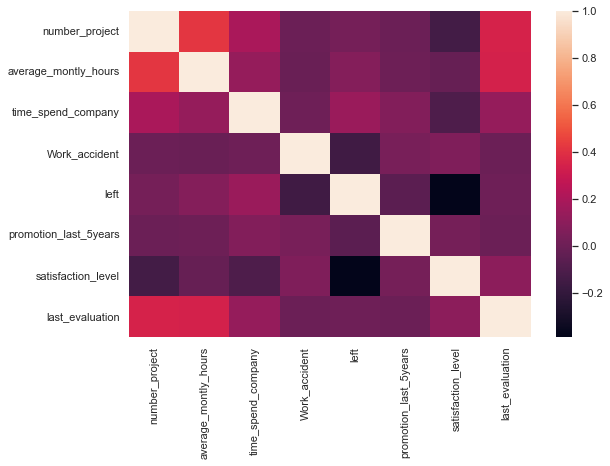

In [248]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr())

In [249]:
df.corr()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
number_project,1.000000,0.416828,0.196896,-0.004761,0.025021,-0.005494,-0.143974,0.348967
average_montly_hours,0.416828,1.000000,0.127632,-0.010112,0.072530,-0.003271,-0.020893,0.339140
time_spend_company,0.196896,0.127632,1.000000,0.002075,0.145425,0.067698,-0.101194,0.131116
Work_accident,-0.004761,-0.010112,0.002075,1.000000,-0.155111,0.038209,0.059090,-0.006782
left,0.025021,0.072530,0.145425,-0.155111,1.000000,-0.062626,-0.388663,0.006883
promotion_last_5years,-0.005494,-0.003271,0.067698,0.038209,-0.062626,1.000000,0.025965,-0.007827
satisfaction_level,-0.143974,-0.020893,-0.101194,0.059090,-0.388663,0.025965,1.000000,0.103783
last_evaluation,0.348967,0.339140,0.131116,-0.006782,0.006883,-0.007827,0.103783,1.000000


<AxesSubplot:>

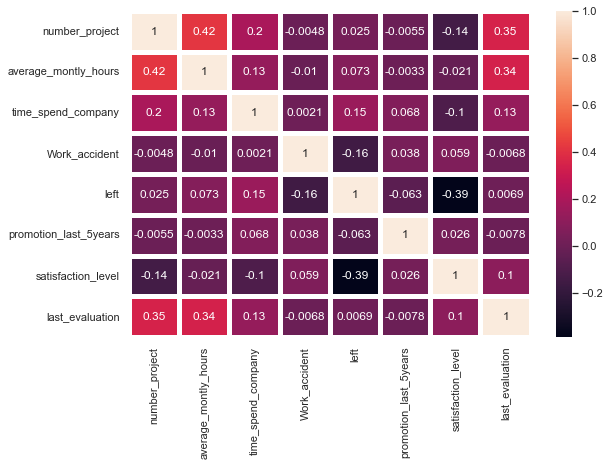

In [250]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True,linewidths=5, ax=ax) 

- 2.2.4. Ngoại lai

<AxesSubplot:xlabel='last_evaluation'>

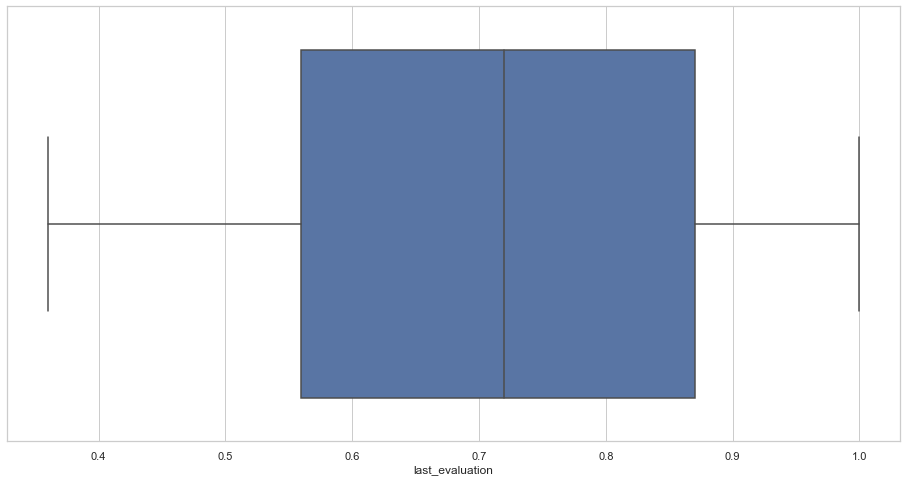

In [251]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x = df['last_evaluation'])

<AxesSubplot:xlabel='time_spend_company'>

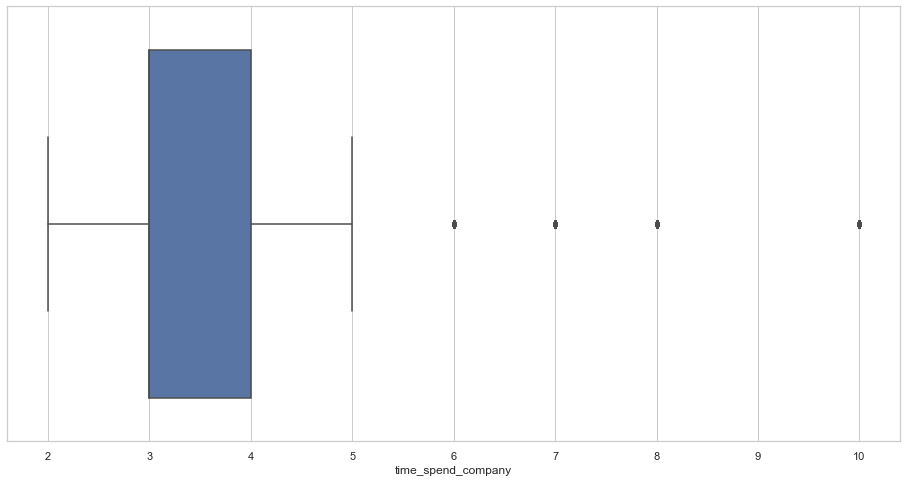

In [252]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x = df['time_spend_company'])

In [253]:
Q1 = df['number_project'].quantile(0.25)
Q3 = df['number_project'].quantile(0.75)
IQR = Q3 - Q1
print(f'Chỉ số IQR là: {IQR} ')

Test_1 = ~((df['time_spend_company'] > (Q3 + 1.5 * IQR)))
Subequal = df[Test_1]
Test_2 = ~((df['time_spend_company'] < (Q3 + 1.5 * IQR)))
Outstanding = df[Test_2]
print(f'Dữ liệu còn lại sau khi lấy outlier là {(Subequal.shape[0] / df.shape[0]) * 100} %')
print(Subequal.shape)
Subequal.head() 


Chỉ số IQR là: 2.0 
Dữ liệu còn lại sau khi lấy outlier là 98.5721910862023 %
(14774, 10)


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [254]:
df['left']

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14988, dtype: int64

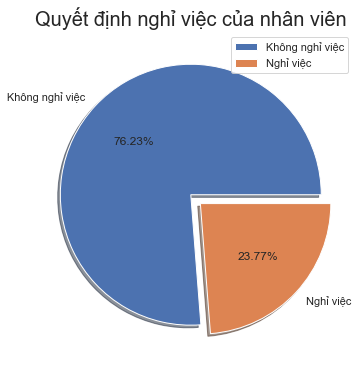

In [255]:
f, ax = plt.subplots(figsize=(15, 6))
x = [11426, 3562]
labels = ['Không nghỉ việc','Nghỉ việc']
explode = [0, 0.1]
plt.pie(x, labels=labels,shadow=True, autopct='%1.2f%%', explode=explode);
plt.title('Quyết định nghỉ việc của nhân viên', fontsize = 20);
plt.legend() 

# III. Mô hình dự báo

Các thư viện cần dùng 


In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [257]:
df_ML = df

3.1 Chuẩn bị dữ liệu 

In [258]:
categorial = ['department','salary']
df_ML = pd.get_dummies(df_ML, columns=categorial, drop_first=True)
shape1 = df_ML.shape[1] - df.shape[1]
print(f'Dữ liệu sau khi chuẩn hóa có thêm {shape1} cột')

Dữ liệu sau khi chuẩn hóa có thêm 9 cột


In [259]:
df_ML.shape

(14988, 19)

In [261]:
# Loại bỏ biến dự báo, chỉ định dữ liệu còn lại vào X
X = df_ML.drop(['left'],axis=1).values

# Chỉ định biến dự báo vào y
y = df_ML['left'].values 

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [266]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3.2 Lựa chọn mô hình

3.3 Chạy mô hình dự báo

- 3.3.1. Linear

In [290]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) 

Kết quả dự báo đúng 79.05%
[[3198  256]
 [ 686  357]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3454
           1       0.58      0.34      0.43      1043

    accuracy                           0.79      4497
   macro avg       0.70      0.63      0.65      4497
weighted avg       0.77      0.79      0.77      4497



In [294]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(predictions, y_test)))

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))  

Kết quả dự báo đúng 79.05%

True Positives(TP) =  3198

True Negatives(TN) =  357

False Positives(FP) =  256

False Negatives(FN) =  686


<AxesSubplot:>

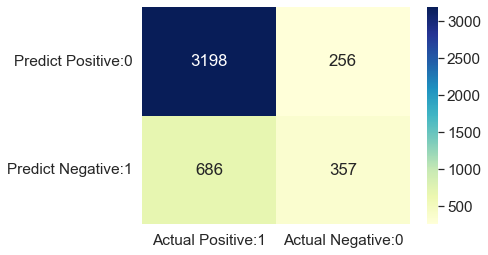

In [293]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

- 3.3.2. Logictics

In [280]:
from sklearn import linear_model

In [284]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)
predicted = logr.predict(X_test)

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(predicted, y_test)))
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))  

Kết quả dự báo đúng 67.38%
[[2282 1172]
 [ 295  748]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      3454
           1       0.39      0.72      0.50      1043

    accuracy                           0.67      4497
   macro avg       0.64      0.69      0.63      4497
weighted avg       0.77      0.67      0.70      4497



c:\Users\Acer Nitro5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3.3.3. KNN

In [303]:
from sklearn import neighbors, datasets

In [304]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  

Kết quả dự báo đúng 96.60%
[[3343  111]
 [  42 1001]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3454
           1       0.90      0.96      0.93      1043

    accuracy                           0.97      4497
   macro avg       0.94      0.96      0.95      4497
weighted avg       0.97      0.97      0.97      4497



3.3.4. random forest

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.09%
[[3444   10]
 [  31 1012]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3454
           1       0.99      0.97      0.98      1043

    accuracy                           0.99      4497
   macro avg       0.99      0.98      0.99      4497
weighted avg       0.99      0.99      0.99      4497



In [300]:
from sklearn import neighbors, datasets

In [302]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  

Kết quả dự báo đúng 96.60%
[[3343  111]
 [  42 1001]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3454
           1       0.90      0.96      0.93      1043

    accuracy                           0.97      4497
   macro avg       0.94      0.96      0.95      4497
weighted avg       0.97      0.97      0.97      4497



3.4 Đánh giá mô hình

No handles with labels found to put in legend.


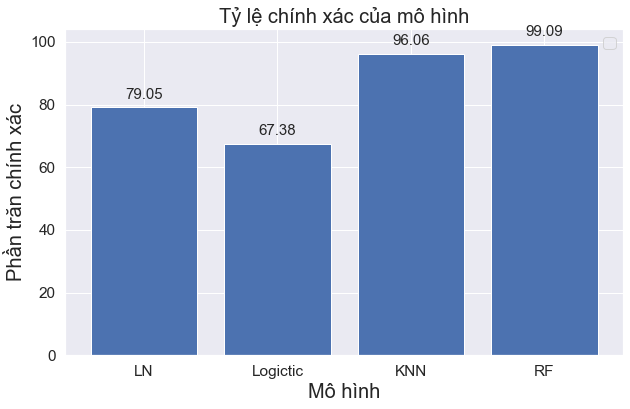

In [321]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,6]

x = 'LN','Logictic','KNN','RF'
y = [79.05,67.38,96.06,99.09]

bar = plt.bar(x, y)
plt.title('Tỷ lệ chính xác của mô hình', fontsize = 20)
plt.xlabel('Mô hình', fontsize = 20)
plt.ylabel('Phần trăn chính xác', fontsize = 20)
plt.bar_label(bar, padding=6, size=15)
plt.legend()
plt.show()